# Marketing Analytics - Email Campaign Classification

The aim of this project is to build a model that can predict whether user opens the email campaign sent by Shopee.

**Background Information**

Sending emails is one of the marketing channels Shopee uses to reach out to our users. Being able to predict whether a user opens an email allows Shopee to forecast and evaluate the performance of future marketing campaigns before launch. This is because when a user opens an email, the probability of the user knowing the campaign increases and this in turn increases the probability of the user making a checkout during the campaign period. Therefore, with the predicted open rates, Shopee can better develop, strategize and implement future marketing campaigns.

**Source** 
https://www.kaggle.com/c/open-shopee-code-league-marketing-analytics/overview

---

**Table of Contents**

1. Import Datasets and General Inspection
2. Prepare The Dataset
3. Classification using Modelling Using Random Forest
4. Classification using Modelling using Neural Network
5. Prepare The Unlabelled Dataset
6. Predict The Unlabelled Dataset

---

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## 1. Import Datasets and General Inspection

**a. Import train, test, and users datasets**

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_users = pd.read_csv("users.csv")

**b. Inspection on df_train**

In [3]:
df_train.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

Description of each columns:
* **country_code**: An integer code for the country where the user lives.
* **grass_date**: The date when the email was sent.
* **user_id**: the unique identifier of each user
* **subject_line_length**: the number of characters in the subject of the email
* **last_open_day**: How many days ago was the last time the user opened an email
* **last_login_day**: How many days ago the user last logged in its Shopee account
* **last_checkout_day**: How many days ago the user last purchased on Shopee
* **open_count_last_[10/30/60]_days**: the total number of email opens in the last N days.
* **login_count_last_[10/30/60]_days**: the total number of user logins in the last N days.
* **checkout_count_last_[10/30/60]_days**: the total number of checkouts (=purchases) by the user in the last N days.
* **open_flag**: the target variable. Whether or not the email was opened.
* **row_id**: the unique identifier of each row

In [5]:
df_train.describe()

,country_code,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.00000
mean,2.533159,63048.595358,43.656373,0.911829,2.780457,5.019364,8.382287,25.284053,49.010430,0.909898,2.796040,5.420960,0.155781,36769.00000
std,1.675251,36068.006037,11.219323,1.754052,4.570239,7.902313,13.424436,37.853189,71.819327,2.887416,7.686064,13.980182,0.362650,21229.02506
min,1.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,31679.500000,34.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,18384.50000
50%,2.000000,63340.000000,43.000000,0.000000,1.000000,2.000000,3.000000,11.000000,22.000000,0.000000,0.000000,1.000000,0.000000,36769.00000
75%,3.000000,94731.500000,52.000000,1.000000,3.000000,6.000000,12.000000,35.000000,69.000000,1.000000,3.000000,6.000000,0.000000,55153.50000
max,7.000000,127925.000000,75.000000,31.000000,92.000000,135.000000,254.000000,735.000000,1260.000000,157.000000,531.000000,783.000000,1.000000,73538.00000


In [6]:
cnt = df_train['last_checkout_day'].value_counts()
cnt

Never checkout    16905
1                  3184
2                  2611
3                  2159
4                  2065
                  ...  
986                   1
765                   1
724                   1
1039                  1
1127                  1
Name: last_checkout_day, Length: 947, dtype: int64

* There isn't any null values at df_train
* grass_date, last_open_day, last_login_day, last_checkout_day are object type
* grass_date is in date format, while last_open_day, last_login_day, and last_checkout_day has value such as "Never Open", "Never login", and "Never Checkout". These columns should be processed first. 
* country_code refers to the code for the country where the user lives. This columns should be processed too.

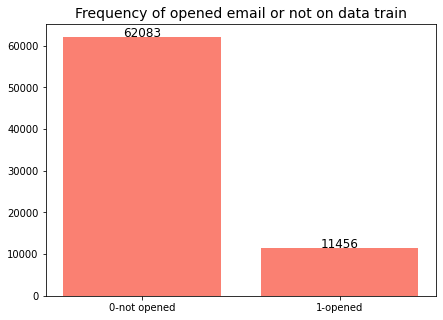

In [7]:
cnt = df_train['open_flag'].value_counts()
plt.figure(figsize=(7,5))
x = ['0-not opened','1-opened']
y = []
for i in cnt:
    y.append(i)
plt.bar(x,y, color='salmon')
plt.title('Frequency of opened email or not on data train', fontsize=14)
for index,data in enumerate(y):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=12), ha='center')
plt.show()

The labels (open_flag, which signify whether the users open the email or not) are widely imbalance.

**c. Inspection on df_users**

In [8]:
df_users.head()

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com


In [9]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


Description of each columns:

* **user_id**: the unique identifier of each user
* **attr_[1/2/3]**: general user attributes. Attr_1 and attr_2 are boolean, attrib_3 is categorical (can be integer [0,1,2,3,4])
* **age**: The user's reported age.
* **domain**: The user's top-level email domain. Less common domains are bundled together under the label 'other'.

In [10]:
df_users.describe()

,user_id,attr_1,attr_2,attr_3,age
count,127886.000000,78987.000000,127439.000000,127886.000000,78987.000000
mean,63961.168760,0.999823,0.998007,1.079782,31.370124
std,36928.842572,0.013312,0.044600,1.035413,11.591752
min,0.000000,0.000000,0.000000,0.000000,-17.000000
25%,31981.250000,1.000000,1.000000,0.000000,24.000000
50%,63958.500000,1.000000,1.000000,1.000000,29.000000
75%,95941.750000,1.000000,1.000000,2.000000,36.000000
max,127925.000000,1.000000,1.000000,4.000000,118.000000


In [11]:
df_users.isna().sum()

user_id        0
attr_1     48899
attr_2       447
attr_3         0
age        48899
domain         0
dtype: int64

(array([2.0000e+00, 1.6300e+02, 3.2500e+02, 2.1740e+03, 3.0151e+04,
        2.7312e+04, 1.1507e+04, 5.7070e+03, 8.8900e+02, 2.0600e+02,
        4.1000e+01, 3.0000e+00, 1.2000e+01, 2.0000e+01, 4.7500e+02]),
 array([-17.,  -8.,   1.,  10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,
         82.,  91., 100., 109., 118.]),
 <BarContainer object of 15 artists>)

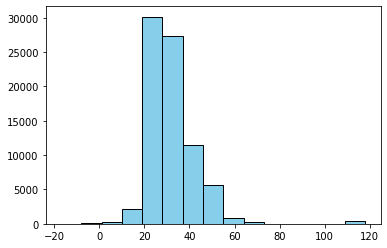

In [12]:
plt.hist(df_users['age'], bins=15, color="skyblue", edgecolor="black")

* There are null values for attr_1, attr_2, attr_3, and age columns. 
* Age columns seems irrelevent since users could input any random date for their birthday 

**d. Inspection on df_test**

In [13]:
df_test.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55970 entries, 0 to 55969
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 55970 non-null  int64 
 1   grass_date                   55970 non-null  object
 2   user_id                      55970 non-null  int64 
 3   subject_line_length          55970 non-null  int64 
 4   last_open_day                55970 non-null  object
 5   last_login_day               55970 non-null  object
 6   last_checkout_day            55970 non-null  object
 7   open_count_last_10_days      55970 non-null  int64 
 8   open_count_last_30_days      55970 non-null  int64 
 9   open_count_last_60_days      55970 non-null  int64 
 10  login_count_last_10_days     55970 non-null  int64 
 11  login_count_last_30_days     55970 non-null  int64 
 12  login_count_last_60_days     55970 non-null  int64 
 13  checkout_count_last_10_days  55

The test data has the same columns as train data except for open_flag, which will be  predicted by the model. 

In [15]:
df_test.describe()

,country_code,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
count,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.00000
mean,2.835215,65049.007790,42.212703,0.774272,2.441880,5.323530,8.978899,26.289459,50.713882,1.124674,3.219385,5.933893,27984.50000
std,1.728489,37934.945847,12.276136,1.752984,4.786883,9.053473,13.975840,38.572656,73.289199,3.500704,8.197445,14.233715,16157.29162
min,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,32293.250000,35.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,13992.25000
50%,3.000000,64683.000000,41.000000,0.000000,0.000000,2.000000,4.000000,13.000000,25.000000,0.000000,1.000000,2.000000,27984.50000
75%,4.000000,97776.500000,48.000000,1.000000,3.000000,6.000000,13.000000,36.000000,70.000000,1.000000,3.000000,7.000000,41976.75000
max,7.000000,127922.000000,79.000000,30.000000,79.000000,120.000000,329.000000,746.000000,1300.000000,252.000000,404.000000,609.000000,55969.00000


---

## 2. Prepare The Dataset

**a. Pre-processing train data**

In [16]:
#create a new dataframe for feature engineering 

#Apply one-hot encoding for the country code column
df = df_train[['country_code']].copy()
encoded_columns = pd.get_dummies(df['country_code'])
df = df.join(encoded_columns).drop('country_code', axis=1)

#Extract info on the weekday date and month that the grass date is on
df['weekday_date'] = pd.to_datetime(df_train.grass_date).dt.day_name()
df['month'] = pd.to_datetime(df_train.grass_date).dt.month

#Include the subject line length
df['subject_line_length']=df_train['subject_line_length'].copy()

# To convert the last open day into integer type and for last open day, it is set as 0
df['last_open_day'] = df_train.last_open_day.apply(lambda x: 1000 if x =='Never open' else x)
df['last_open_day']=df['last_open_day'].astype(str).astype(int)

# To convert the last login day into integer type 
df['last_login_day'] = df_train.last_login_day.apply(lambda x: 20000 if x =='Never login' else x)
df['last_login_day'] = df['last_login_day'].astype(str).astype(int)

# To convert the last checkout day into integer type 
df['last_checkout_day'] = df_train.last_checkout_day.apply(lambda x: 1500 if x =='Never checkout' else x)
df['last_checkout_day'] = df['last_checkout_day'].astype(str).astype(int)

df.head(5)

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,last_open_day,last_login_day,last_checkout_day
0,0,0,0,1,0,0,0,Tuesday,7,44,19,6,18
1,0,0,0,1,0,0,0,Tuesday,7,44,9,4,8
2,0,0,0,0,0,1,0,Tuesday,7,49,14,5,5
3,1,0,0,0,0,0,0,Tuesday,7,49,49,9,53
4,0,0,0,0,0,1,0,Tuesday,7,49,227,6,221


In [17]:
#remove noise in open count last 10/30/60 days

#set last open that is more than 10,30,60 days ago as 0 under open_count_last_10/30/60_days
df['open_count_last_10_days'] = df_train['open_count_last_10_days'].copy()
df['open_count_last_10_days'] = df.apply(lambda x: 0 if (x['last_open_day'] > 10) else x['open_count_last_10_days'],axis =1)

df['open_count_last_30_days'] = df_train['open_count_last_30_days'].copy()
df['open_count_last_30_days'] = df.apply(lambda x: 0 if (x['last_open_day'] > 30) else x['open_count_last_30_days'],axis =1)

df['open_count_last_60_days'] = df_train['open_count_last_60_days'].copy()
df['open_count_last_60_days'] = df.apply(lambda x: 0 if (x['last_open_day'] > 60) else x['open_count_last_60_days'],axis =1)

#set last open that is less than 10 days ago as 1 under open_count_last_10/30/60_days
df['open_count_last_10_days'] = df.apply(lambda x: 1 if ((x['last_open_day'] <= 10) & (x['open_count_last_10_days']==0)) else x['open_count_last_10_days'],axis=1)
df['open_count_last_30_days'] = df.apply(lambda x: 1 if ((x['last_open_day'] <= 30) & (x['open_count_last_30_days']==0)) else x['open_count_last_30_days'],axis =1)
df['open_count_last_60_days'] = df.apply(lambda x: 1 if ((x['last_open_day'] <= 60) & (x['open_count_last_60_days']==0)) else x['open_count_last_60_days'],axis =1)
df.head()

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days
0,0,0,0,1,0,0,0,Tuesday,7,44,19,6,18,0,2,4
1,0,0,0,1,0,0,0,Tuesday,7,44,9,4,8,2,9,17
2,0,0,0,0,0,1,0,Tuesday,7,49,14,5,5,0,4,12
3,1,0,0,0,0,0,0,Tuesday,7,49,49,9,53,0,0,1
4,0,0,0,0,0,1,0,Tuesday,7,49,227,6,221,0,0,0


In [18]:
#remove noise in login count last 10/30/60 days

#set those that are last login more than 10,30,60 days ago as 0 under open_count_last_10/30/60_days
df['login_count_last_10_days'] = df_train['login_count_last_10_days'].copy()
df['login_count_last_10_days'] = df.apply(lambda x: 0 if (x['last_login_day'] > 10) else x['login_count_last_10_days'],axis =1)

df['login_count_last_30_days'] = df_train['login_count_last_30_days'].copy()
df['login_count_last_30_days'] = df.apply(lambda x: 0 if (x['last_login_day'] > 30) else x['login_count_last_30_days'],axis =1)

df['login_count_last_60_days'] = df_train['login_count_last_60_days'].copy()
df['login_count_last_60_days'] = df.apply(lambda x: 0 if (x['last_login_day'] > 60) else x['login_count_last_60_days'],axis =1)

#set those that are last login less than 10,30,60 days ago as 1 under open_count_last_10/30/60_days
df['login_count_last_10_days'] = df.apply(lambda x: 1 if ((x['last_login_day'] <= 10) & (x['login_count_last_10_days']==0)) else x['login_count_last_10_days'],axis=1)
df['login_count_last_30_days'] = df.apply(lambda x: 1 if ((x['last_login_day'] <= 30) & (x['login_count_last_30_days']==0)) else x['login_count_last_30_days'],axis =1)
df['login_count_last_60_days'] = df.apply(lambda x: 1 if ((x['last_login_day'] <= 60) & (x['login_count_last_60_days']==0)) else x['login_count_last_60_days'],axis =1)
df.head()

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days
0,0,0,0,1,0,0,0,Tuesday,7,44,19,6,18,0,2,4,12,43,99
1,0,0,0,1,0,0,0,Tuesday,7,44,9,4,8,2,9,17,18,48,90
2,0,0,0,0,0,1,0,Tuesday,7,49,14,5,5,0,4,12,24,69,119
3,1,0,0,0,0,0,0,Tuesday,7,49,49,9,53,0,0,1,9,23,69
4,0,0,0,0,0,1,0,Tuesday,7,49,227,6,221,0,0,0,2,5,5


In [19]:
# remove noise in checkout count last 10/30/60 days

# set those that are last checkout more than 10/30/60 days ago as 0 under open_count_last_10/30/60_days
df['checkout_count_last_10_days'] = df_train['checkout_count_last_10_days'].copy()
df['checkout_count_last_10_days'] = df.apply(lambda x: 0 if (x['last_checkout_day'] > 10) else x['checkout_count_last_10_days'],axis =1)

df['checkout_count_last_30_days'] = df_train['checkout_count_last_30_days'].copy()
df['checkout_count_last_30_days'] = df.apply(lambda x: 0 if (x['last_checkout_day'] > 30) else x['checkout_count_last_30_days'],axis =1)

df['checkout_count_last_60_days'] = df_train['checkout_count_last_60_days'].copy()
df['checkout_count_last_60_days'] = df.apply(lambda x: 0 if (x['last_checkout_day'] > 60) else x['checkout_count_last_60_days'],axis =1)

# set those that are last checkout less than 10/30/60 days ago as 1 under open_count_last_10/30/60_days
df['checkout_count_last_10_days'] = df.apply(lambda x: 1 if ((x['last_checkout_day'] <= 10) & (x['checkout_count_last_10_days']==0)) else x['checkout_count_last_10_days'],axis=1)
df['checkout_count_last_30_days'] = df.apply(lambda x: 1 if ((x['last_checkout_day'] <= 30) & (x['checkout_count_last_30_days']==0)) else x['checkout_count_last_30_days'],axis =1)
df['checkout_count_last_60_days'] = df.apply(lambda x: 1 if ((x['last_checkout_day'] <= 60) & (x['checkout_count_last_60_days']==0)) else x['checkout_count_last_60_days'],axis =1)
df.head()

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,...,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days
0,0,0,0,1,0,0,0,Tuesday,7,44,...,18,0,2,4,12,43,99,0,5,10
1,0,0,0,1,0,0,0,Tuesday,7,44,...,8,2,9,17,18,48,90,1,1,4
2,0,0,0,0,0,1,0,Tuesday,7,49,...,5,0,4,12,24,69,119,5,19,27
3,1,0,0,0,0,0,0,Tuesday,7,49,...,53,0,0,1,9,23,69,0,0,6
4,0,0,0,0,0,1,0,Tuesday,7,49,...,221,0,0,0,2,5,5,0,0,0


In [20]:
df['user_id']= df_train['user_id'].copy()
df['open_flag']=df_train['open_flag'].copy()

In [21]:
# Apply one-hot encoding for the weekday date column
encoded_columns = pd.get_dummies(df['weekday_date'])
df = df.join(encoded_columns).drop('weekday_date', axis=1)

**b. Pre-processing users data**

In [22]:
# Apply one-hot encoding for the domain column
encoded_columns = pd.get_dummies(df_users['domain'])
df_users  = df_users.join(encoded_columns).drop('domain', axis=1)

#-1 assigned for missing data
df_users['attr_1']= df_users['attr_1'].fillna(-1)
df_users['attr_2']= df_users['attr_2'].fillna(-1)
df_users.head()

,user_id,attr_1,attr_2,attr_3,age,@163.com,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other
0,0,-1.0,1.0,0.0,NaN,0,1,0,0,0,0,0,0,0,0,0
1,1,1.0,1.0,2.0,50.0,0,1,0,0,0,0,0,0,0,0,0
2,2,-1.0,1.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,1
3,3,-1.0,1.0,0.0,NaN,0,1,0,0,0,0,0,0,0,0,0
4,4,1.0,1.0,2.0,33.0,0,1,0,0,0,0,0,0,0,0,0


**c. Merge data users to data train**

In [23]:
#merge data train and data users
data_train = pd.merge(left=df, right=df_users, left_on='user_id', right_on='user_id')
data_train.head()

,1,2,3,4,5,6,7,month,subject_line_length,last_open_day,...,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other
0,0,0,0,1,0,0,0,7,44,19,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,7,44,9,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,7,49,14,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,7,49,49,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,7,49,227,...,0,1,0,0,0,0,0,0,0,0


In [24]:
#dropping these columns since it's unnecessary
data_train.drop(['user_id','age'], axis = 1, inplace = True)

**d. Feature Importances**

In [25]:
rf = RandomForestClassifier(n_estimators = 100, max_features='auto', criterion= 'gini', 
                            max_depth = 80,class_weight = {0:5, 1:1})

In [26]:
X = data_train.drop(columns=['open_flag'])
Y = data_train['open_flag']

rf.fit(X,Y)
feat_importances = pd.Series(rf.feature_importances_, index = X.columns)
print(feat_importances.sort_values(ascending = False))

open_count_last_60_days        0.094608
open_count_last_30_days        0.092718
last_login_day                 0.082100
open_count_last_10_days        0.071663
last_checkout_day              0.071377
last_open_day                  0.070718
login_count_last_60_days       0.068677
subject_line_length            0.060170
login_count_last_30_days       0.060066
login_count_last_10_days       0.045446
checkout_count_last_60_days    0.039268
checkout_count_last_30_days    0.030065
attr_3                         0.027823
month                          0.018913
checkout_count_last_10_days    0.018672
4                              0.012912
attr_1                         0.012079
Tuesday                        0.009434
Thursday                       0.008985
Friday                         0.008899
Monday                         0.008779
Wednesday                      0.008090
Sunday                         0.007983
@gmail.com                     0.007643
3                              0.007253


In [27]:
data_train.drop(['@rocketmail.com','@163.com','attr_2','@ymail.com','@outlook.com','@outlook.com','@live.com',
                '@qq.com','@icloud.com','other','@hotmail.com',6,'Saturday'], axis = 1, inplace = True)

In [28]:
data_train.head()

,1,2,3,4,5,7,month,subject_line_length,last_open_day,last_login_day,...,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday,attr_1,attr_3,@gmail.com,@yahoo.com
0,0,0,0,1,0,0,7,44,19,6,...,0,0,0,0,1,0,1.0,2.0,1,0
1,0,0,0,1,0,0,7,44,9,4,...,0,0,0,0,1,0,1.0,2.0,0,0
2,0,0,0,0,0,0,7,49,14,5,...,0,0,0,0,1,0,-1.0,0.0,0,1
3,1,0,0,0,0,0,7,49,49,9,...,0,0,0,0,1,0,1.0,2.0,0,1
4,0,0,0,0,0,0,7,49,227,6,...,0,0,0,0,1,0,-1.0,0.0,0,0


**e. Splitting data for modeling**

In [29]:
from sklearn.model_selection import train_test_split

# separate the independent and target variable 
train_X = data_train.drop(columns=['open_flag'])
test_X = data_train['open_flag']

# randomly split the data
x_train, x_test, y_train, y_test = train_test_split(train_X, test_X,test_size=0.3,random_state=0)

# shape of train and test splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((51477, 30), (22062, 30), (51477,), (22062,))

---

## 3. Classification using Random Forest Algorithm
- Hyperparameter tuning for Random Forest model
- Set the model with best parameter
- Train and test the model
- Evaluate the model performance

**a. Hyperparameter tuning for Random Forest model**

In [30]:
param_grid = {
    'max_depth': [60,80,100],
    'n_estimators': [80, 100]
} 

# Create a based model
rf = RandomForestClassifier(criterion = 'gini', max_features='auto', class_weight = {0:5, 1:1})  
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [31]:
# Fit the grid search to the data
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'max_depth': 100, 'n_estimators': 80}


**b. Set the model with best parameters**

In [32]:
rf = RandomForestClassifier(n_estimators = 80, max_features='auto', criterion= 'gini', 
                            max_depth = 100, min_samples_split = 2, class_weight = {0:5, 1:1})

**c. Train and test the model**

In [33]:
rf.fit(x_train,y_train) #train data
y_pred = rf.predict(x_test) # test data
y_true = y_test

**d. Evaluate the model performance**

In [34]:
print("Accuracy Train:", rf.score(x_train,y_train))
print("Accuracy Test :", rf.score(x_test,y_test))
f1_rf = metrics.f1_score(y_true, y_pred, average='weighted')
print("F1 Score      :", f1_rf)

Accuracy Train: 0.9998445907881189
Accuracy Test : 0.888042788505122
F1 Score      : 0.8779309349850837


Since the data label's (open_flag) is imbalanced, f1-score is the suitable metrics for this study.
The f1-score is 0.88 which is quite good.

In [35]:
#Confusion Matrix
cf_matrix = confusion_matrix(y_true, y_pred)

Text(0.5, 24.0, 'Predicted Values')

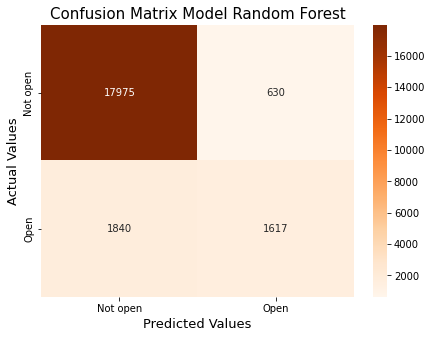

In [36]:
plt.figure(figsize=(7,5))
ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='', cmap='Oranges')
ax.xaxis.set_ticklabels(['Not open', 'Open'])
ax.yaxis.set_ticklabels(['Not open', 'Open'])
plt.title("Confusion Matrix Model Random Forest", fontsize=15)
plt.ylabel('Actual Values', fontsize = 13)
plt.xlabel('Predicted Values', fontsize = 13)

We can see that the model was able to predict 17.975 from 18.605 data as not open, and 1.617 from 3.457 data as open.

There are 1.840 data that supposed to have the 'open' label but predicted as 'not open'. It is quite concerning since those that is wrongly predicted are more than the correct one. It could happen since the train data of 'open' label is quite low compared to the 'not open' label.

---

## 4. Classification using Neural Network

- Hyperparameter tuning for Neural Network model
- Set the model with best parameter
- Train and test the model
- Evaluate the model performance

**a. Hyperparameter tuning for Neural Network model**

In [48]:
param_nn = {
    'hidden_layer_sizes': [(10), (15)],
    'alpha': [0.0001, 0.0002, 0.0005],
    'batch_size' : [200,500],
}

# Create a based model
nn = MLPClassifier(max_iter=50) 
# Instantiate the grid search model
grid_searchnn = GridSearchCV(estimator = nn, param_grid = param_nn, cv = 2, n_jobs = -1, verbose = 2)

In [49]:
grid_searchnn.fit(x_train,y_train)
grid_searchnn.best_params_

Fitting 2 folds for each of 12 candidates, totalling 24 fits


{'alpha': 0.0001, 'batch_size': 200, 'hidden_layer_sizes': 10}

**b. Set the model with best parameter**

In [50]:
nn = MLPClassifier(hidden_layer_sizes = 10,activation ='relu', solver='adam', alpha = 0.0001,  max_iter=50, batch_size = 200) 

**c. Train and test the model**

In [51]:
nn.fit(x_train,y_train) #train model
y_pred = nn.predict(x_test) # test model
y_true = y_test

**d. Evaluate the model performance**

In [52]:
print("Accuracy Train:   ", nn.score(x_train,y_train))
print("Accuracy Test:   ", nn.score(x_test,y_test))
f1_rf = metrics.f1_score(y_true, y_pred, average='weighted')
print("F Score:   ", f1_rf)

Accuracy Train:    0.8810731006080386
Accuracy Test:    0.8792947148943886
F Score:    0.8695981829459445


In [53]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)

Text(0.5, 1.0, 'Confusion Matrix Model Neural Network')

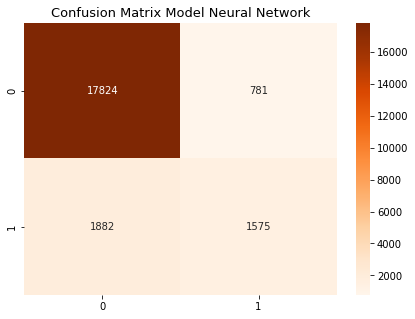

In [54]:
plt.figure(figsize=(7,5))
ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='', cmap='Oranges')
plt.title("Confusion Matrix Model Neural Network", fontsize=13)

We can see that the neural network model was able to predict 17.824 from 18.605 data as not open, and 1.575 from 3.457 data as open.

There are 1.882 data that supposed to have the 'open' label but predicted as 'not open'.

---

## 5. Prepare the Unlabelled Dataset
Prepare data_test by apply data pre-processing just like the data_train, and merge to user dataset

**a. Pre-processing the users data**

In [55]:
#create a new data frame for feature engineering 

#Apply one-hot encoding for the country code column
dftest = df_test[['country_code']].copy()
encoded_columns = pd.get_dummies(dftest['country_code'])
dftest = dftest.join(encoded_columns).drop('country_code', axis=1)

#Extract info on the weekday date and month that the grass date is on
dftest['weekday_date'] = pd.to_datetime(df_test.grass_date).dt.day_name()
dftest['month'] = pd.to_datetime(df_test.grass_date).dt.month

#Include the subject line length
dftest['subject_line_length'] = df_test['subject_line_length'].copy()

# To convert the last open day into integer type and for last open day, it is set as 0
dftest['last_open_day'] = df_test.last_open_day.apply(lambda x: 1000 if x =='Never open' else x)
dftest['last_open_day'] = dftest['last_open_day'].astype(str).astype(int)

# To convert the last login day into integer type 
dftest['last_login_day'] = df_test.last_login_day.apply(lambda x: 20000 if x =='Never login' else x)
dftest['last_login_day'] = dftest['last_login_day'].astype(str).astype(int)

# To convert the last checkout day into integer type 
dftest['last_checkout_day'] = df_test.last_checkout_day.apply(lambda x: 1500 if x =='Never checkout' else x)
dftest['last_checkout_day'] = dftest['last_checkout_day'].astype(str).astype(int)
df.head(5)

,1,2,3,4,5,6,7,month,subject_line_length,last_open_day,...,checkout_count_last_60_days,user_id,open_flag,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0,7,44,19,...,10,43,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,7,44,9,...,4,102,1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,7,49,14,...,27,177,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,7,49,49,...,6,184,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,7,49,227,...,0,221,0,0,0,0,0,0,1,0


In [56]:
#remove noise in open count last 10/30/60 days

#set those that are last open more than 10/30/60 days ago as 0 under open_count_last_10/30/60_days
dftest['open_count_last_10_days'] = df_test['open_count_last_10_days'].copy()
dftest['open_count_last_10_days'] = dftest.apply(lambda x: 0 if (x['last_open_day'] > 10) else x['open_count_last_10_days'],axis =1)

dftest['open_count_last_30_days'] = df_test['open_count_last_30_days'].copy()
dftest['open_count_last_30_days'] = dftest.apply(lambda x: 0 if (x['last_open_day'] > 30) else x['open_count_last_30_days'],axis =1)

dftest['open_count_last_60_days'] = df_test['open_count_last_60_days'].copy()
dftest['open_count_last_60_days'] = dftest.apply(lambda x: 0 if (x['last_open_day'] > 60) else x['open_count_last_60_days'],axis =1)

#set those that are last open less than 10/30/60 days ago as 1 under open_count_last_10/30/60_days
dftest['open_count_last_10_days'] = dftest.apply(lambda x: 1 if ((x['last_open_day'] <= 10) & (x['open_count_last_10_days']==0)) else x['open_count_last_10_days'],axis=1)
dftest['open_count_last_30_days'] = dftest.apply(lambda x: 1 if ((x['last_open_day'] <= 30) & (x['open_count_last_30_days']==0)) else x['open_count_last_30_days'],axis =1)
dftest['open_count_last_60_days'] = dftest.apply(lambda x: 1 if ((x['last_open_day'] <= 60) & (x['open_count_last_60_days']==0)) else x['open_count_last_60_days'],axis =1)

In [57]:
#remove noise in login count last 10/30/60 days

#set those that are last login more than 10/30/60 days ago as 0 under open_count_last_10/30/60_days
dftest['login_count_last_10_days'] = df_test['login_count_last_10_days'].copy()
dftest['login_count_last_10_days'] = dftest.apply(lambda x: 0 if (x['last_login_day'] > 10) else x['login_count_last_10_days'],axis =1)

dftest['login_count_last_30_days'] = df_test['login_count_last_30_days'].copy()
dftest['login_count_last_30_days'] = dftest.apply(lambda x: 0 if (x['last_login_day'] > 30) else x['login_count_last_30_days'],axis =1)

dftest['login_count_last_60_days'] = df_test['login_count_last_60_days'].copy()
dftest['login_count_last_60_days'] = dftest.apply(lambda x: 0 if (x['last_login_day'] > 60) else x['login_count_last_60_days'],axis =1)

#set those that are last login less than 10/30/60 days ago as 1 under open_count_last_10/30/60_days
dftest['login_count_last_10_days'] = dftest.apply(lambda x: 1 if ((x['last_login_day'] <= 10) & (x['login_count_last_10_days']==0)) else x['login_count_last_10_days'],axis=1)
dftest['login_count_last_30_days'] = dftest.apply(lambda x: 1 if ((x['last_login_day'] <= 30) & (x['login_count_last_30_days']==0)) else x['login_count_last_30_days'],axis =1)
dftest['login_count_last_60_days'] = dftest.apply(lambda x: 1 if ((x['last_login_day'] <= 60) & (x['login_count_last_60_days']==0)) else x['login_count_last_60_days'],axis =1)

In [58]:
# remove noise in checkout count last 10/30/60 days

# set those that are last checkout more than 10/30/60 days ago as 0 under open_count_last_10/30/60_days
dftest['checkout_count_last_10_days'] = df_test['checkout_count_last_10_days'].copy()
dftest['checkout_count_last_10_days'] = dftest.apply(lambda x: 0 if (x['last_checkout_day'] > 10) else x['checkout_count_last_10_days'],axis =1)

dftest['checkout_count_last_30_days'] = df_test['checkout_count_last_30_days'].copy()
dftest['checkout_count_last_30_days'] = dftest.apply(lambda x: 0 if (x['last_checkout_day'] > 30) else x['checkout_count_last_30_days'],axis =1)

dftest['checkout_count_last_60_days'] = df_test['checkout_count_last_60_days'].copy()
dftest['checkout_count_last_60_days'] = dftest.apply(lambda x: 0 if (x['last_checkout_day'] > 60) else x['checkout_count_last_60_days'],axis =1)

# set those that are last checkout less than 10/30/60 days ago as 1 under open_count_last_10/30/60_days
dftest['checkout_count_last_10_days'] = dftest.apply(lambda x: 1 if ((x['last_checkout_day'] <= 10) & (x['checkout_count_last_10_days']==0)) else x['checkout_count_last_10_days'],axis=1)
dftest['checkout_count_last_30_days'] = dftest.apply(lambda x: 1 if ((x['last_checkout_day'] <= 30) & (x['checkout_count_last_30_days']==0)) else x['checkout_count_last_30_days'],axis =1)
dftest['checkout_count_last_60_days'] = dftest.apply(lambda x: 1 if ((x['last_checkout_day'] <= 60) & (x['checkout_count_last_60_days']==0)) else x['checkout_count_last_60_days'],axis =1)

In [59]:
# Apply one-hot encoding for the weekday date column
encoded_columns = pd.get_dummies(dftest['weekday_date'])
dftest = dftest.join(encoded_columns).drop('weekday_date', axis=1)

**b. Merge users data to test data**

In [60]:
dftest['user_id']= df_test['user_id'].copy()
df_test_1 = pd.merge(left=dftest, right=df_users, left_on='user_id', right_on='user_id')

**c. Dropping uneccesaary columns just like the train data**

In [61]:
df_test_1.drop(['user_id','age'], axis = 1, inplace = True)
df_test_1.drop(['@rocketmail.com','@163.com','attr_2','@ymail.com','@outlook.com','@outlook.com','@live.com',
                '@qq.com','@icloud.com','other','@hotmail.com',6,'Saturday'], axis = 1, inplace = True)

In [62]:
df_test_1.head()

,1,2,3,4,5,7,month,subject_line_length,last_open_day,last_login_day,...,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday,attr_1,attr_3,@gmail.com,@yahoo.com
0,0,0,0,0,0,0,9,35,27,2,...,0,0,0,0,1,0,-1.0,0.0,1,0
1,0,0,0,0,0,0,9,35,7,5,...,0,0,0,0,1,0,-1.0,0.0,1,0
2,0,0,0,0,1,0,9,25,34,1,...,0,0,0,0,1,0,1.0,2.0,1,0
3,1,0,0,0,0,0,9,36,63,5,...,0,0,0,0,1,0,1.0,2.0,0,1
4,0,0,0,0,1,0,9,23,6,5,...,0,0,0,0,1,0,-1.0,0.0,1,0


---

## 6. Predict The Unlabelled Dataset
I will use Random Forest Model which has better performance (f1 score) rather than the Neural Network one.

In [63]:
#predict the test data using model random forest
predictions = rf.predict(df_test_1)

In [64]:
columns_titles = ["row_id","open_flag"]
predictions_df = pd.DataFrame(predictions)
predictions_df['row_id'] = predictions_df.index
predictions_df.rename(columns = {0: 'open_flag'}, inplace = True)
predictions_df['open_flag']= predictions_df['open_flag'].astype(int)
predictions_df=predictions_df.reindex(columns=columns_titles)
print(predictions_df)

       row_id  open_flag
0           0          0
1           1          0
2           2          0
3           3          0
4           4          0
...       ...        ...
55965   55965          0
55966   55966          0
55967   55967          0
55968   55968          0
55969   55969          1

[55970 rows x 2 columns]


In [65]:
cntpred = predictions_df['open_flag'].value_counts()

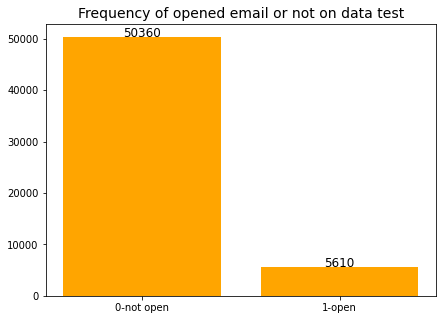

In [66]:
plt.figure(figsize=(7,5))
x = ['0-not open','1-open']
y = []
for i in cntpred:
  y.append(i)
plt.bar(x,y, color='orange')
plt.title('Frequency of opened email or not on data test', fontsize=14)
for index,data in enumerate(y):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=12), ha='center')
plt.show()

Based on the predictions using random forest model, there are 5.610 users that will open the email campaign sent by the company.

In [67]:
predictions_df.to_csv('hasilprediksi.csv')